In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl

df = pd.read_csv('fy2022pa-4.csv')
origin = df
df.describe()

,PID,GIS_ID,ZIPCODE,BLDG_SEQ,NUM_BLDGS,LUC,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,...,LIVING_AREA,YR_BUILT,YR_REMODEL,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,FIRE_PLACE,NUM_PARKING
count,1.785980e+05,1.785880e+05,178598.00000,178596.000000,178598.000000,178598.000000,155274.000000,68889.000000,178598.000000,178598.000000,...,1.554000e+05,155400.000000,92092.000000,178598.000000,178598.000000,178598.000000,178598.000000,178598.000000,178598.000000,178598.000000
mean,1.146950e+09,1.146981e+09,2129.96365,1.001030,1.016568,202.703658,1.985120,3.485506,0.848895,1.750384,...,4.075272e+03,1931.219376,2000.690907,2.339897,1.261464,0.208334,0.998455,5.173093,0.253452,0.996109
std,7.071651e+08,7.071739e+08,31.00676,0.033615,0.465474,265.488262,1.494114,5.213310,5.704592,217.596454,...,3.728762e+04,43.294292,14.397468,2.286059,1.065369,0.450836,0.831180,4.672984,0.609179,2.647339
min,1.000010e+08,1.000010e+08,2026.00000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1700.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.019000e+08,5.019000e+08,2119.00000,1.000000,1.000000,102.000000,1.000000,1.000000,0.000000,0.000000,...,8.300000e+02,1900.000000,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.102950e+09,1.102954e+09,2127.00000,1.000000,1.000000,102.000000,2.000000,2.000000,0.000000,0.000000,...,1.400000e+03,1920.000000,2003.000000,2.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000
75%,1.810752e+09,1.810752e+09,2131.00000,1.000000,1.000000,108.000000,2.500000,4.000000,1.000000,0.000000,...,2.512000e+03,1962.000000,2013.000000,3.000000,2.000000,0.000000,1.000000,7.000000,0.000000,2.000000
max,2.205670e+09,2.205670e+09,2467.00000,4.000000,119.000000,995.000000,62.000000,60.000000,716.000000,89892.000000,...,6.982322e+06,2021.000000,2021.000000,18.000000,17.000000,6.000000,5.000000,78.000000,12.000000,775.000000


In [2]:
df['TOTAL_VALUE']= df['TOTAL_VALUE'].str.replace(",","").astype(float)
v= df['TOTAL_VALUE'].mean()
df['TOTAL_VALUE'] = df['TOTAL_VALUE'].fillna(v)
#fill nan with average value
print(v)

1420961.3701449372


<BarContainer object of 13 artists>

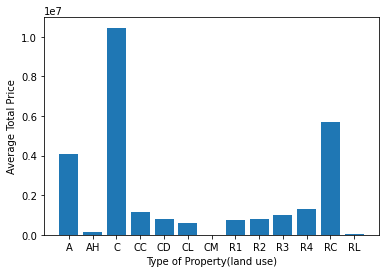

In [3]:
import matplotlib.pyplot as plt
A = df[(df['LU'] == 'A')]['TOTAL_VALUE'].mean()
AH = df[(df['LU'] == 'AH')]['TOTAL_VALUE'].mean()
C = df[(df['LU'] == 'C')]['TOTAL_VALUE'].mean()
CC = df[(df['LU'] == 'CC')]['TOTAL_VALUE'].mean()
CD = df[(df['LU'] == 'CD')]['TOTAL_VALUE'].mean()
CL = df[(df['LU'] == 'CL')]['TOTAL_VALUE'].mean()
CM = df[(df['LU'] == 'CM')]['TOTAL_VALUE'].mean()
RC = df[(df['LU'] == 'RC')]['TOTAL_VALUE'].mean()
RL = df[(df['LU'] == 'RL')]['TOTAL_VALUE'].mean()
R1 = df[(df['LU'] == 'R1')]['TOTAL_VALUE'].mean()
R2 = df[(df['LU'] == 'R2')]['TOTAL_VALUE'].mean()
R3 = df[(df['LU'] == 'R3')]['TOTAL_VALUE'].mean()
R4 = df[(df['LU'] == 'R4')]['TOTAL_VALUE'].mean()
plt.xlabel("Type of Property(land use)")
plt.ylabel("Average Total Price")
plt.bar(['A','AH','C','CC','CD','CL','CM','R1', 'R2','R3','R4','RC','RL'],[A, AH, C, CC, CD, CL, CM, R1,R2, R3, R4, RC, RL])

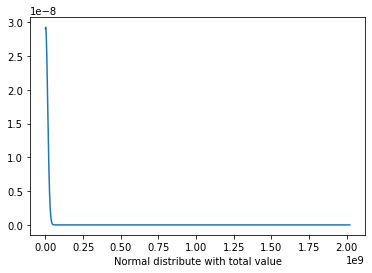

In [4]:
l1 = df['TOTAL_VALUE'].values.tolist()
l1 = [i for i in l1 if i != 0]
#remove all total value = 0
l1.sort()


mean = np.mean(l1)
std = np.std(l1)
pdf = stats.norm.pdf(l1, mean, std)
plt.xlabel('Normal distribute with total value')
plt.plot(l1, pdf)